In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as mplt
import seaborn as sns

In [7]:
assign2 = pds.read_csv("cereal.csv",sep=";")

In [8]:
assign2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [9]:
assign2.shape

(78, 16)

In [10]:
assign2.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [12]:
assign2 = assign2.iloc[1:]
assign2.drop(["name"],axis=1,inplace=True)
assign2 = pds.get_dummies(assign2, columns=['mfr','type'])

In [13]:
assign2 = assign2.apply(pds.to_numeric)

C:\Users\RB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

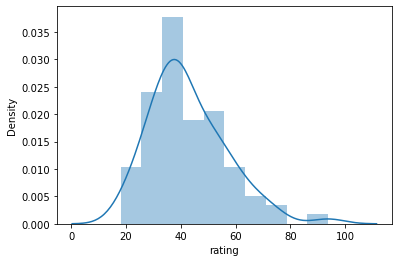

In [14]:
sns.distplot(df["rating"])

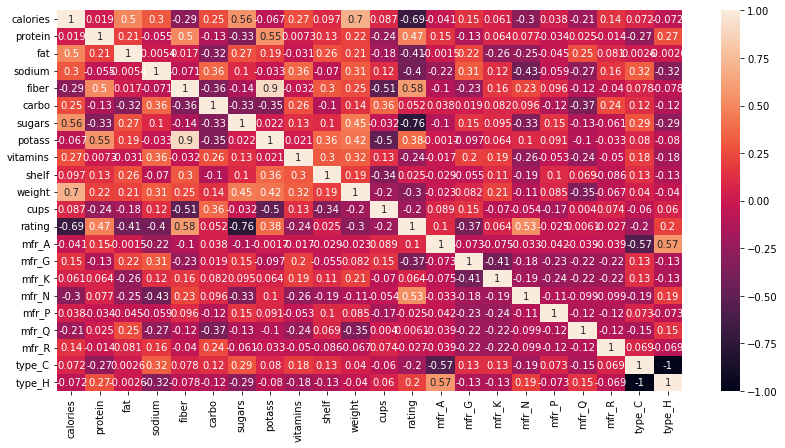

In [16]:
fig, ax = mplt.subplots(figsize=(14,7))

assign2_temp = assign2[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating', 'mfr_A',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']]

corrMatrix = assign2_temp.corr()
sns.heatmap(corrMatrix, annot=True)
mplt.show()

In [17]:
assign2 = assign2[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
        'vitamins', 'shelf', 'weight', 'cups', 'rating', 'mfr_A',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C']]

In [19]:
X = assign2.drop(["rating"],axis=1,inplace=False)
y = assign2[["rating"]]

In [20]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_training,y_training)
regression.score(X_test,y_test)

0.9824499221826716

In [22]:
regression.predict(X_test)

array([[27.80945267],
       [41.68972857],
       [61.19395096],
       [59.14798067],
       [46.75541975],
       [45.17051455],
       [35.51699934],
       [35.45311747],
       [30.7387913 ],
       [41.36256717],
       [39.3354435 ],
       [72.94898499],
       [40.06869633],
       [31.04115211],
       [56.56474702],
       [59.12391239]])

In [23]:
def estimate_coef_multiple_linear_regression(X_training, y_training):
    return np.dot(np.linalg.inv(np.dot(X_training.transpose(),X_training)),np.dot(X_training.transpose(),y_training))

In [24]:
X_training = np.array(X_training.astype("float"))
X_test = np.array(X_test.astype("float"))
y_training = np.array(y_training.astype("float"))
y_test = np.array(y_test.astype("float"))

In [25]:
Theta = estimate_coef_multiple_linear_regression(X_training, y_training)

In [26]:
y_pred = np.dot(X_test,Theta)

In [27]:
y_pred

array([[27.80945267],
       [41.68972857],
       [61.19395096],
       [59.14798067],
       [46.75541975],
       [45.17051455],
       [35.51699934],
       [35.45311747],
       [30.7387913 ],
       [41.36256717],
       [39.3354435 ],
       [72.94898499],
       [40.06869633],
       [31.04115211],
       [56.56474702],
       [59.12391239]])

In [28]:
def r_squared(y_test, y_pred):
    return 1 - ((np.sum((y_test-y_pred)**2)) / np.sum((y_test - np.mean(y_test))**2))

In [29]:
r_squared(y_test, y_pred)

0.982449922182678

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.982449922182678